In [1]:
from nwbwidgets import nwb2widget
import nwbwidgets
from pynwb import NWBHDF5IO
import pynwb

import pandas as pd
import numpy as np

from collections import OrderedDict

In [64]:
from ipywidgets import widgets
from ipywidgets import interactive

import matplotlib.pyplot as plt

from IPython import display


class SimpleInteractiveTables:

    def __init__(self, tables=None):
        if tables is None:
            tables = {}
        self.tables = tables
    
    def __call__(self, node, **kwargs):
        if node.name not in self.tables:
            self.tables[node.name] = self.build_table(node)
        df = self.tables[node.name]
        
        def view(bounds, columns):
            return display.display(df.iloc[bounds[0]:bounds[1], :].loc[:, columns])

        _slider = widgets.IntRangeSlider(
            value=[0, 10],
            min=0,
            max=df.shape[0],
            step=1,
            continuous_update=False,
        )

        _columns = widgets.SelectMultiple(
            options=df.columns.values,
            value=tuple(df.columns.values),
        )
        
        if node.name == 'units':
            #unit_id = 7
            #spike_times = df.iloc[df.index == 7]['spike_times']
            index_list = df.index.tolist()
            spike_times = df.spike_times.tolist()
            
            plt.rcParams["figure.figsize"] = (12,12)
            plt.eventplot(spike_times) 
            #print(spike_times_all[10])
            plt.xlabel('Time (sec)')
            plt.ylabel('Unit')

        return interactive(view, bounds=_slider, columns=_columns)
    
    def build_table(self, node):
        df = node.to_dataframe(exclude=set(['timeseries', 'timeseries_index']))
        df.sort_values(by='id', axis=0, inplace=True)
        return df

vis_spec = OrderedDict({
    pynwb.misc.AnnotationSeries: OrderedDict({
        'text': nwbwidgets.view.show_text_fields,
        'times': nwbwidgets.misc.show_annotations}),
    pynwb.core.LabelledDict: nwbwidgets.view.dict2accordion,
    pynwb.ProcessingModule: lambda x: nwbwidgets.nwb2widget(x.data_interfaces),
    pynwb.core.DynamicTable: SimpleInteractiveTables(),
    pynwb.ecephys.LFP: nwbwidgets.ecephys.show_lfp,
    pynwb.behavior.Position: nwbwidgets.behavior.show_position,
    pynwb.behavior.SpatialSeries: nwbwidgets.behavior.show_spatial_series,
    pynwb.TimeSeries: nwbwidgets.base.show_timeseries,
    pynwb.core.NWBBaseType: nwbwidgets.base.show_neurodata_base
})


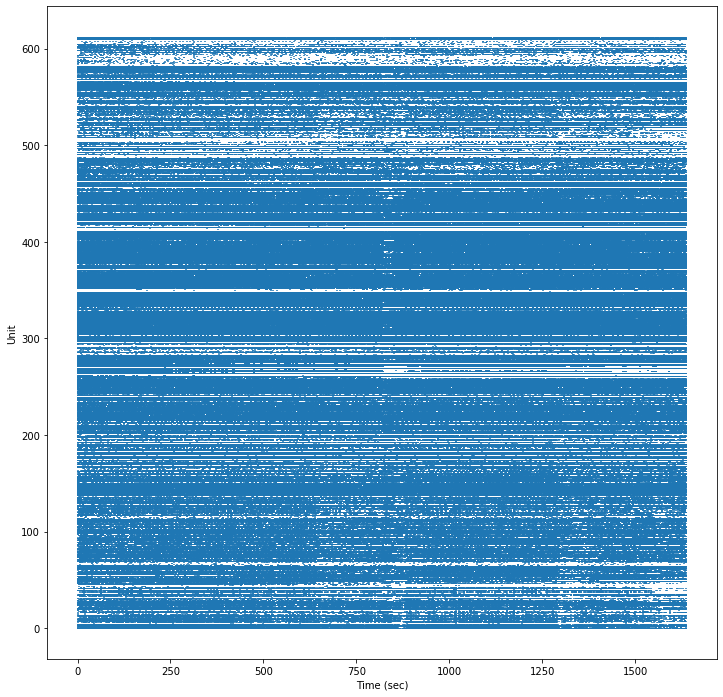

In [65]:
path = 'G:\\My Drive\\Giocomo\\data\\npI5_0417_baseline_1.nwb'

io = NWBHDF5IO(path, 'r')
nwbfile = io.read()

nwbwidgets.nwb2widget(nwbfile, vis_spec)

In [ ]:
io.close()